In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


In [9]:
from keras.datasets import mnist



In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:

x_train[1234].shape

(28, 28)

In [11]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [12]:
from keras.utils import np_utils

In [13]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [14]:
y_train[1234]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD

In [17]:
model = Sequential()

In [20]:
model.add(Conv2D(4, (5,5), padding='same', input_shape=(28, 28, 1),
                activation='relu'))


In [18]:
model.add(MaxPool2D(pool_size=(2,2)))

In [19]:
model.add(Conv2D(8, (5,5 ), padding='same',
                activation='relu'))

In [17]:
model.add(MaxPool2D(pool_size=(2,2)))

In [18]:
model.add(Conv2D(16, (5, 5), padding='same',
                activation='relu'))

In [19]:
model.add(MaxPool2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())
model.add(Dense(9, activation='relu'))

In [21]:
model.add(Dense(10, activation='softmax'))

In [22]:
model.compile(loss='mse', optimizer=SGD(lr=0.07), metrics=['accuracy'])

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 8)         808       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

In [24]:
model.fit(x_train, y_train, batch_size=100, epochs=10)



Epoch 1/10
60000/60000 [==============================] - 24s 395us/step - loss: 0.0900 - acc: 0.1204
Epoch 2/10
60000/60000 [==============================] - 22s 371us/step - loss: 0.0898 - acc: 0.1415
Epoch 3/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0894 - acc: 0.1454
Epoch 4/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0886 - acc: 0.1572
Epoch 5/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0848 - acc: 0.2176
Epoch 6/10
60000/60000 [==============================] - 22s 372us/step - loss: 0.0752 - acc: 0.3424
Epoch 7/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.0586 - acc: 0.5507
Epoch 8/10
60000/60000 [==============================] - 22s 369us/step - loss: 0.0386 - acc: 0.7274
Epoch 9/10
60000/60000 [==============================] - 22s 370us/step - loss: 0.0264 - acc: 0.8196
Epoch 10/10
60000/60000 [==============================] - 22s 369us/step - loss

In [28]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 189us/step


In [29]:
print(f'測試資料的 loss: {score[0]:.5f}')
print(f'測試資料的正確率: {score[1]}')

測試資料的 loss: 0.01836
測試資料的正確率: 0.8762


In [30]:
model.save('myCNNmodel.h5')

In [31]:
del model

In [32]:
from keras.models import load_model

In [33]:
model = load_model('myCNNmodel.h5')

In [34]:
predict = model.predict_classes(x_test)

NameError: name 'predict' is not defined

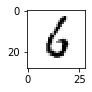

In [26]:
pick = np.random.randint(1,9999, 5)

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[pick[i]].reshape(28,28), cmap='Greys')
    plt.title(predict[pick[i]])
    plt.axis("off")